In [72]:
# PROJECT: SALARY PREDICTION WITH MACHINE LEARNING

In [73]:
# İş Problemi

In [74]:
# Maaş bilgileri ve 1986 yılına ait kariyer istatislikleri paylaşılan beyzbol oyuncularının
# maaş tahminleri için bir makine öğrenmesi projesi

In [75]:
# Veri seti hikayesi

In [76]:
# Bu veri seti orijinal olarak Carnegie Mellon Univesitesi 'nde bulunan kütüphaneden alınmıştır.
# Veri seti 1988 ASA Grafik Bölümü Poster oturumunda kullanılan verilerin bir parçasıdır.
# Maaş verileri orijinal olarak Sports Illustrated, 20 Nisan 1987' den alınmıştır.
# 1986 ve kariyer istatislikleri, Collier Books, Macmillan Publishing Company, New York tarafından yayınlanmıştır.
# 1987 Beyzbol Ansiklopedisi güncellenmesinden elde edilmiştir.

In [77]:
# Batters - Hitters  (Vurucular)

In [78]:
# AtBat : 1986-1987 sezonunda bir beyzbol sopası ile vurulan vuruş sayısı
# Hits : 1986-1987 sezonundaki isabet sayısı
# HmRun : 1986-1987 sezonundaki en değerli vuruş sayısı
# Runs : 1986-1987 sezonunda takımına kazandırdığı sayı
# RBI : Bir vurucunun vuruş yaptığında koşu yaptırdığı oyuncu sayısı
# Walks : Karşı oyuncuya yaptırılan hata sayısı
# Years : Oyuncunun major liginde oynama süresi (Sene)
# CatBat : Oyuncunun kariyeri boyuncu topa vurma sayısı
# CHits : Oyuncunun kariyeri boyunca yaptığı isabetli vuruş sayısı
# CHmRun : Oyuncunun kariyeri boyunca yaptığı en değerli sayısı
# CRuns : Oyuncunun kariyeri boyunca takımına kazzandırdığı sayı
# CRBI : Oyuncunun kariyeri boyunca koşu yaptırdığı oyuncu sayısı oyuncu sayısı
# CWalks : Oyuncunun kariyeri boyunca karşı oyuncuya yaptırdığı hata sayısı
# League : Oyuncunun sezon sonuna kadar oynadığı ligi gösteren A ve N seviyelerine sahip bir faktör
# Divison : 1986 sonunda oyuncunun oynadığı pozisyonu pozisyonu gösteren E ve W seviyelerine sahip bir faktör
# PutOuts : Oyun içinde takım arkadaşınla yardımlaşma
# Assits : 1986-1987 sezonunda oyuncunun yaptığı asist sayısı
# Errors : 1986-1987 sezonundaki oyuncunun hata sayısı
# Salary : Oyuncunun 1986-1987 sezonunda aldığı maaş (bin üzerinden)
# NewLeague : 1987 sezonunun başında oyuncununligini gösteren A ve N seviyelerine sahip  bir faktör

In [79]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [80]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option("display.max_rows", 20)
pd.set_option("display.float_format", lambda x: '%.3f' % x)
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

In [81]:
# Genel Resim
df = pd.read_csv("/content/hitters.csv")

def check_df(dataframe, head=5):
  print("##################### Shape ##################### ")
  print(dataframe.shape)
  print("##################### Types ##################### ")
  print(dataframe.dtypes)
  print("##################### Head ##################### ")
  print(dataframe.head(head))
  print("##################### Tail ##################### ")
  print(dataframe.tail(head))
  print("##################### NA ##################### ")
  print(dataframe.isnull().sum())
  print("###################### Quanties ###################### ")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [82]:
check_df(df)

##################### Shape ##################### 
(322, 20)
##################### Types ##################### 
AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object
##################### Head ##################### 
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague
0    293    66      1    30   29     14      1     293     66       1     30    29      14      A        E      446       33      20     NaN         A
1    315    81      7    24   38     39     14    3449    835      69    321   414     375      N     

In [83]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"observations: {dataframe.shape[0]}")
  print(f"variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")
  return cat_cols, num_cols, cat_but_car

In [84]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 322
variables: 20
cat_cols: 3
num_cols: 17
cat_but_car: 0
num_but_cat: 0


In [85]:
# Kategorik Değişken Analizi
def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)
    plt.show()

        League  Ratio
League               
A          175 54.348
N          147 45.652
##########################################


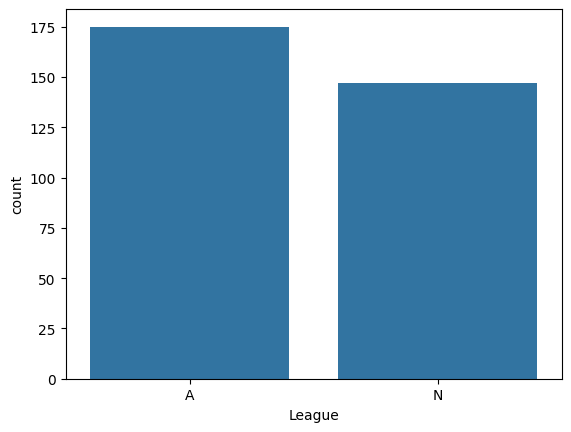

          Division  Ratio
Division                 
W              165 51.242
E              157 48.758
##########################################


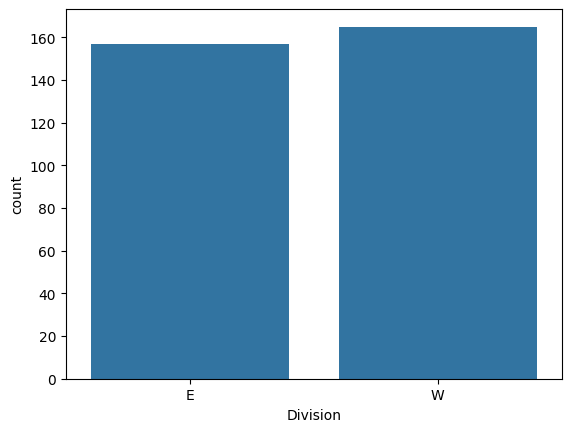

           NewLeague  Ratio
NewLeague                  
A                176 54.658
N                146 45.342
##########################################


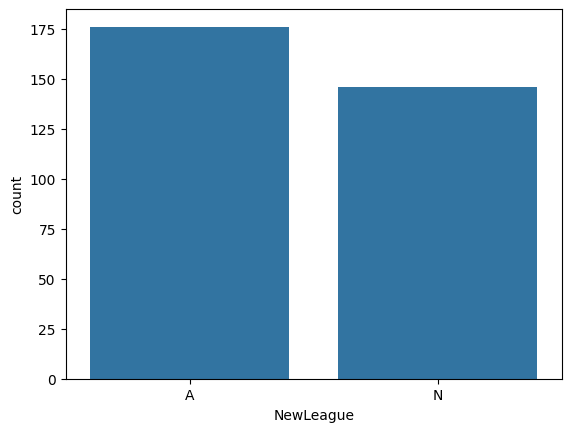

In [86]:
for col in cat_cols:
  cat_summary(df,col, plot=True)

In [87]:
# Sayısal Değişken Analizi (Analysis of Numerical Variables)
def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)


  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

count   322.000
mean    380.929
std     153.405
min      16.000
5%      161.000
10%     194.100
20%     221.800
30%     281.300
40%     321.800
50%     379.500
60%     430.200
70%     490.000
80%     535.600
90%     584.900
95%     609.900
99%     658.590
max     687.000
Name: AtBat, dtype: float64


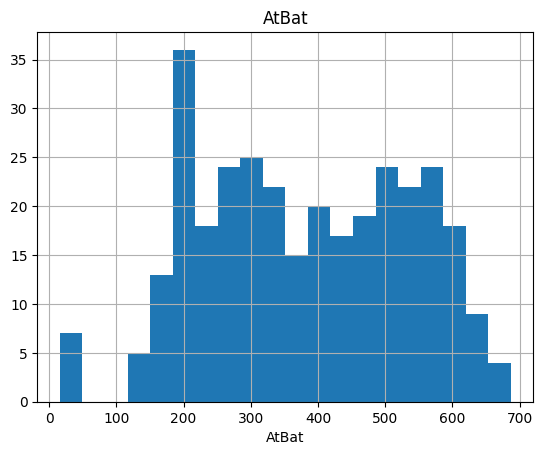

count   322.000
mean    101.025
std      46.455
min       1.000
5%       39.000
10%      45.100
20%      57.000
30%      70.000
40%      82.000
50%      96.000
60%     113.000
70%     128.700
80%     144.000
90%     163.000
95%     174.000
99%     210.790
max     238.000
Name: Hits, dtype: float64


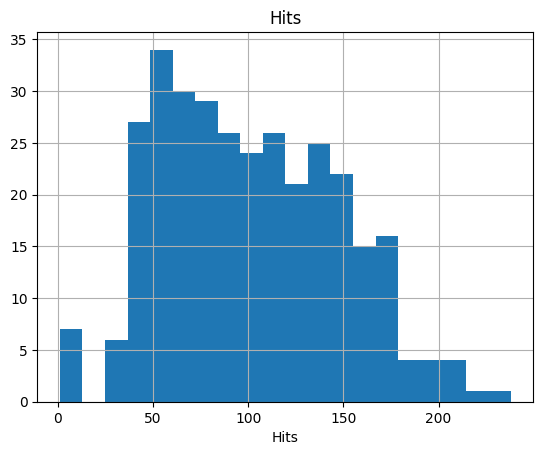

count   322.000
mean     10.770
std       8.709
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       5.000
40%       6.000
50%       8.000
60%      10.600
70%      14.000
80%      18.000
90%      24.000
95%      28.950
99%      33.000
max      40.000
Name: HmRun, dtype: float64


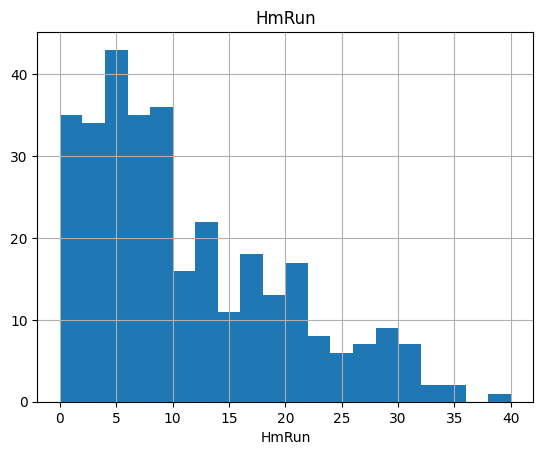

count   322.000
mean     50.910
std      26.024
min       0.000
5%       17.000
10%      20.100
20%      27.000
30%      33.000
40%      41.000
50%      48.000
60%      55.600
70%      66.000
80%      75.800
90%      89.000
95%      94.000
99%     107.790
max     130.000
Name: Runs, dtype: float64


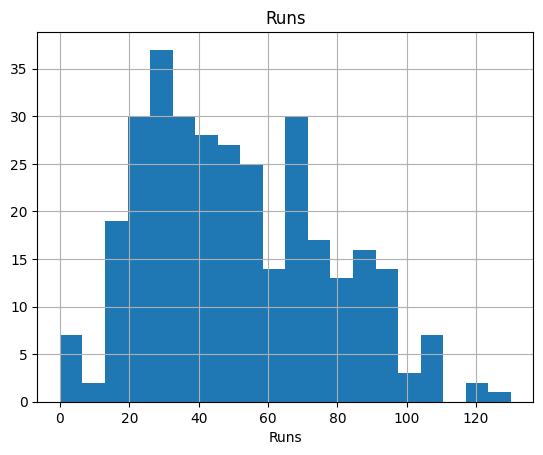

count   322.000
mean     48.028
std      26.167
min       0.000
5%       14.000
10%      19.000
20%      26.000
30%      30.000
40%      36.400
50%      44.000
60%      49.000
70%      58.000
80%      73.000
90%      86.000
95%      96.000
99%     112.370
max     121.000
Name: RBI, dtype: float64


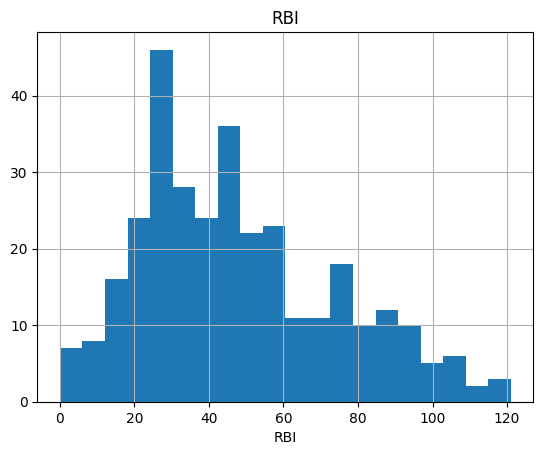

count   322.000
mean     38.742
std      21.639
min       0.000
5%       11.050
10%      15.000
20%      20.000
30%      24.000
40%      30.000
50%      35.000
60%      40.000
70%      48.700
80%      59.000
90%      69.900
95%      78.000
99%      93.580
max     105.000
Name: Walks, dtype: float64


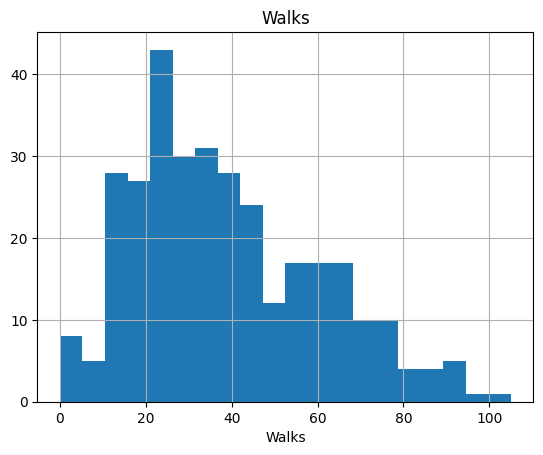

count   322.000
mean      7.444
std       4.926
min       1.000
5%        1.000
10%       2.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       7.600
70%      10.000
80%      12.000
90%      15.000
95%      17.000
99%      19.790
max      24.000
Name: Years, dtype: float64


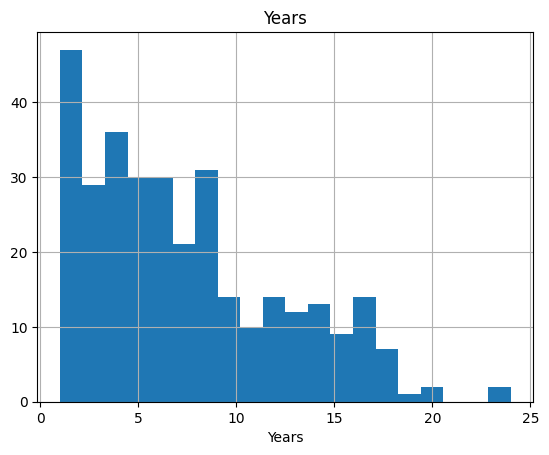

count     322.000
mean     2648.683
std      2324.206
min        19.000
5%        216.500
10%       342.200
20%       667.600
30%       963.400
40%      1402.200
50%      1928.000
60%      2654.000
70%      3365.000
80%      4483.000
90%      6123.400
95%      7125.600
99%      8749.970
max     14053.000
Name: CAtBat, dtype: float64


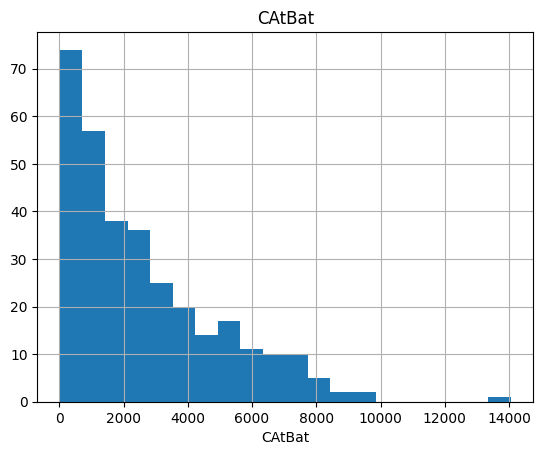

count    322.000
mean     717.571
std      654.473
min        4.000
5%        54.000
10%       86.000
20%      164.600
30%      238.000
40%      355.800
50%      508.000
60%      708.200
70%      911.100
80%     1229.200
90%     1659.600
95%     2017.150
99%     2500.340
max     4256.000
Name: CHits, dtype: float64


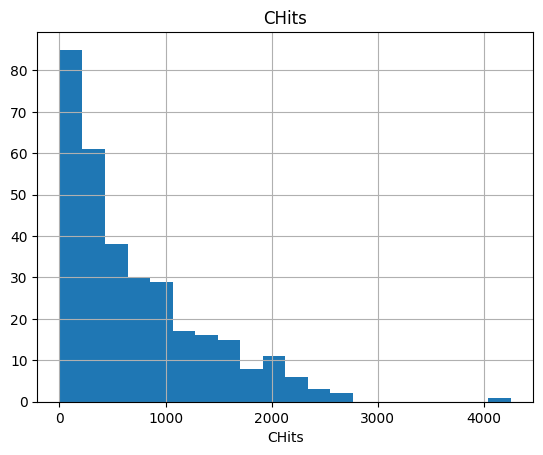

count   322.000
mean     69.491
std      86.266
min       0.000
5%        2.000
10%       4.000
20%      10.200
30%      16.300
40%      27.400
50%      37.500
60%      51.200
70%      72.400
80%     103.800
90%     194.900
95%     265.650
99%     373.120
max     548.000
Name: CHmRun, dtype: float64


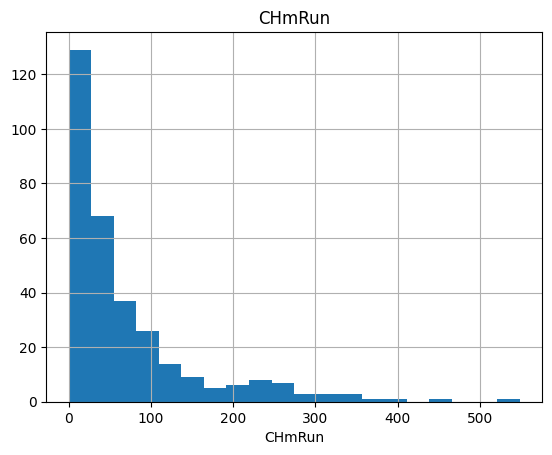

count    322.000
mean     358.795
std      334.106
min        1.000
5%        27.000
10%       38.100
20%       80.400
30%      117.300
40%      181.000
50%      247.000
60%      333.000
70%      443.400
80%      627.200
90%      895.700
95%     1032.300
99%     1174.370
max     2165.000
Name: CRuns, dtype: float64


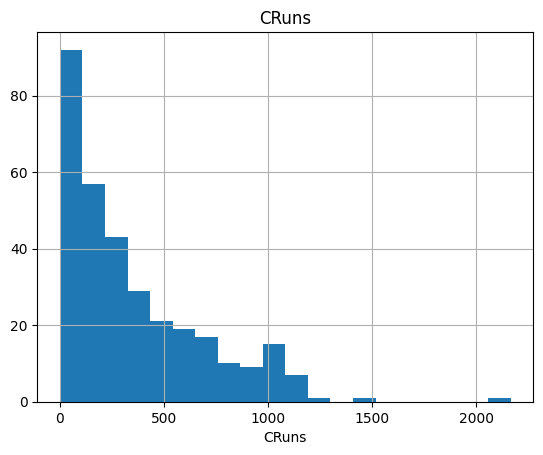

count    322.000
mean     330.118
std      333.220
min        0.000
5%        22.050
10%       34.100
20%       70.200
30%      106.300
40%      149.000
50%      220.500
60%      303.600
70%      379.100
80%      496.200
90%      861.600
95%     1071.750
99%     1310.850
max     1659.000
Name: CRBI, dtype: float64


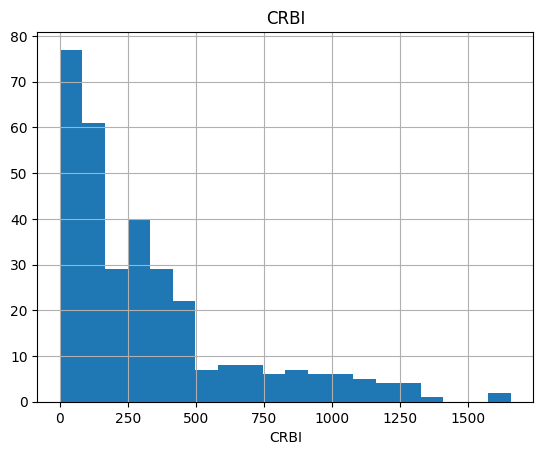

count    322.000
mean     260.239
std      267.058
min        0.000
5%        15.050
10%       30.100
20%       55.000
30%       82.000
40%      117.400
50%      170.500
60%      226.600
70%      300.700
80%      421.000
90%      643.900
95%      817.600
99%     1139.140
max     1566.000
Name: CWalks, dtype: float64


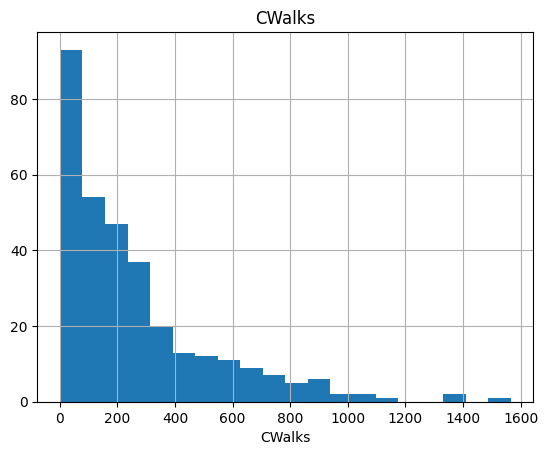

count    322.000
mean     288.938
std      280.705
min        0.000
5%        33.200
10%       62.200
20%       99.600
30%      132.000
40%      167.000
50%      212.000
60%      257.400
70%      303.000
80%      365.800
90%      685.600
95%      910.650
99%     1301.190
max     1378.000
Name: PutOuts, dtype: float64


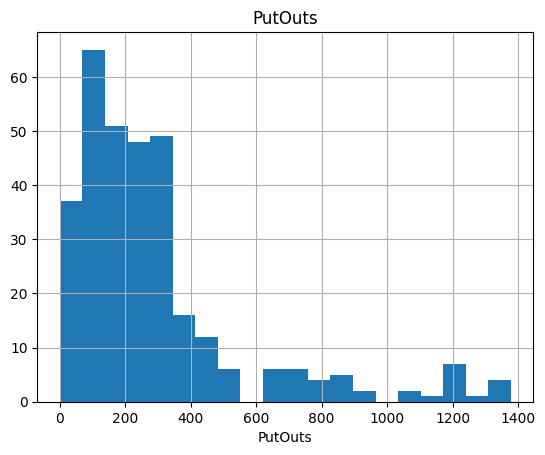

count   322.000
mean    106.913
std     136.855
min       0.000
5%        0.000
10%       2.000
20%       5.200
30%       9.000
40%      15.400
50%      39.500
60%      76.800
70%     134.800
80%     210.800
90%     353.300
95%     431.450
99%     478.160
max     492.000
Name: Assists, dtype: float64


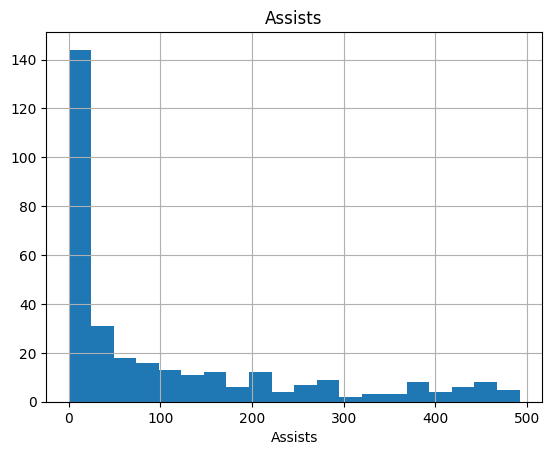

count   322.000
mean      8.040
std       6.368
min       0.000
5%        0.000
10%       1.000
20%       3.000
30%       4.000
40%       5.000
50%       6.000
60%       8.000
70%      10.000
80%      13.000
90%      17.000
95%      20.000
99%      25.790
max      32.000
Name: Errors, dtype: float64


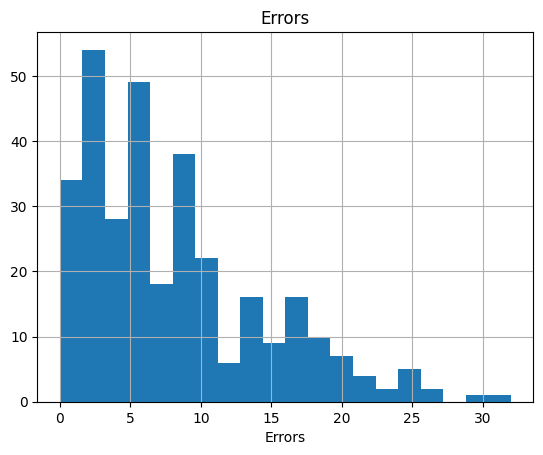

count    263.000
mean     535.926
std      451.119
min       67.500
5%        86.600
10%      100.000
20%      155.000
30%      221.000
40%      300.000
50%      425.000
60%      538.000
70%      700.000
80%      809.000
90%     1048.667
95%     1346.000
99%     2032.887
max     2460.000
Name: Salary, dtype: float64


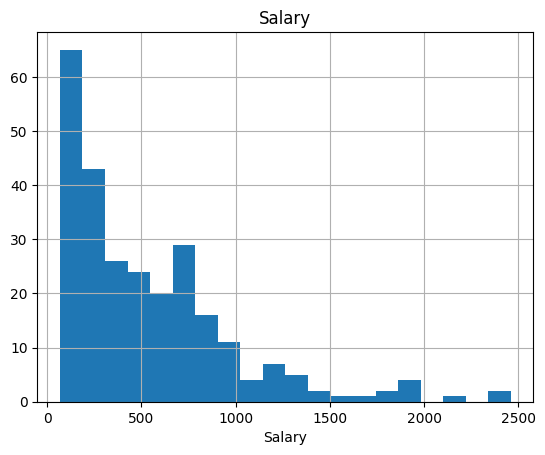

In [88]:
for col in num_cols:
  num_summary(df, col, plot=True)

In [89]:
# Hedef Değişken Analizi (Analysis of Target Variable)
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")

In [90]:
for col in cat_cols:
  target_summary_with_cat(df, "Salary", col)

        TARGET_MEAN
League             
A           542.000
N           529.118


          TARGET_MEAN
Division             
E             624.271
W             450.877


           TARGET_MEAN
NewLeague             
A              537.113
N              534.554




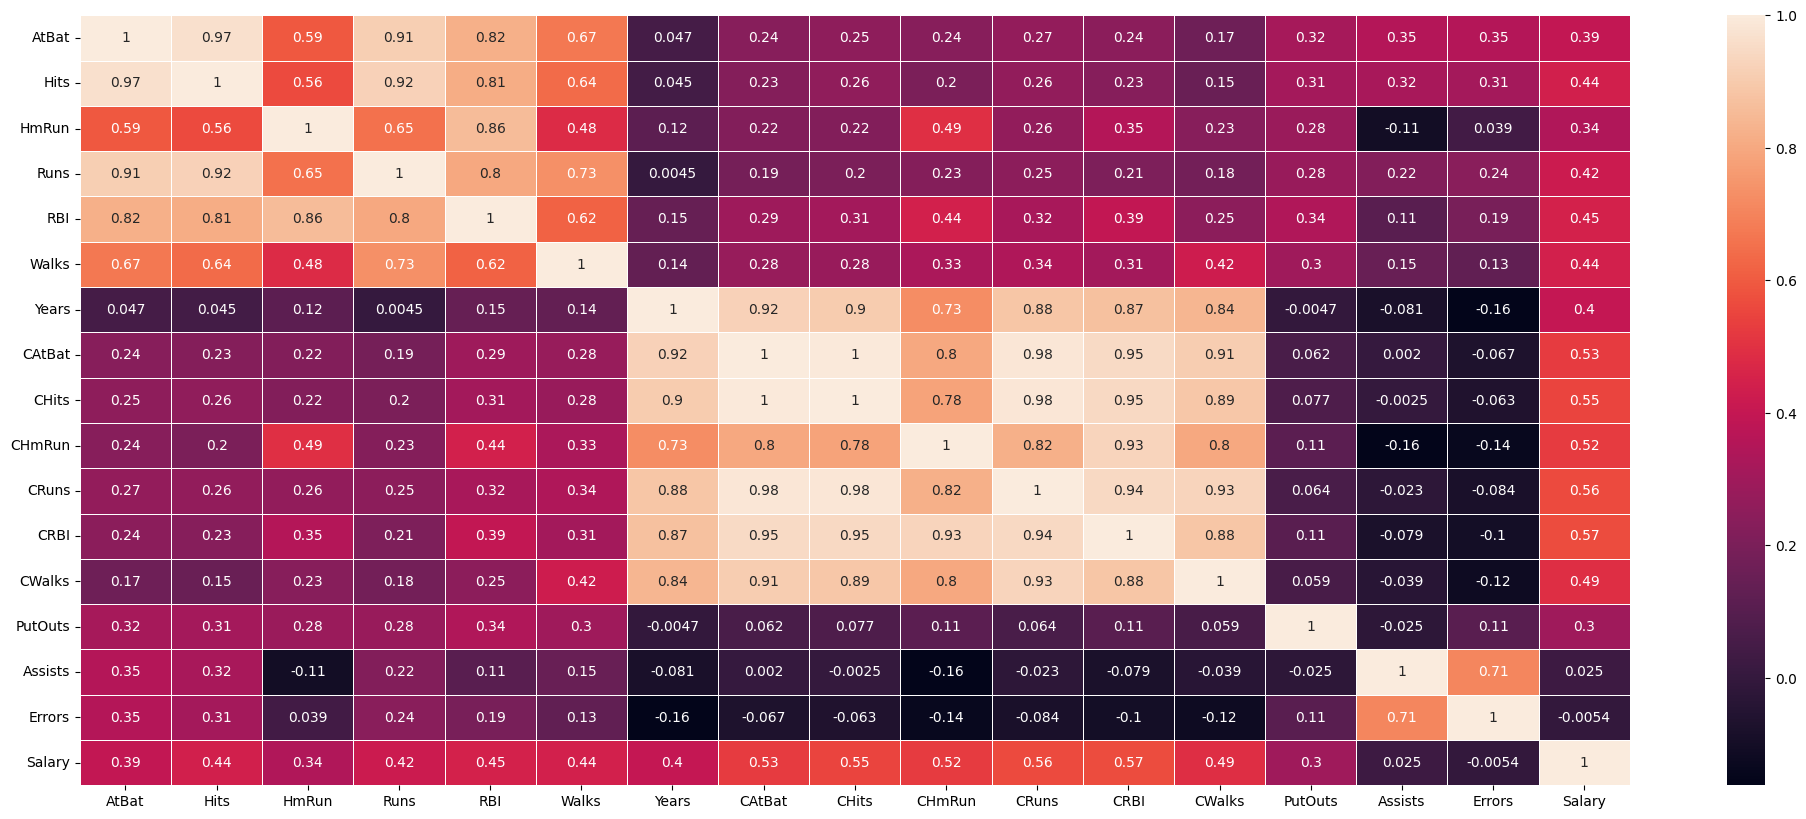

In [91]:
# Korelasyon Analizi (Analysis of Correlation)
df[num_cols].corr(method="spearman")

fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=.5, ax=ax)
plt.show(block=True)

In [92]:
# Korelasyon limitini geçenlere bakalım
def find_correlation(dataframe, numeric_cols, corr_limit=0.50):
  high_correlations = []
  low_correlations = []
  for col in numeric_cols:
    if col == "Salary":
      pass
    else:
      correlation = dataframe[[col, "Salary"]].corr().loc[col, "Salary"]
      print(col, correlation)
      if abs(correlation) > corr_limit:
        high_correlations.append(col + ": " + str(correlation))
      else:
        low_correlations.append(col + ": " + str(correlation))
  return low_correlations, high_correlations

In [93]:
low_correlations, high_correlations = find_correlation(df, num_cols)

AtBat 0.39477094475973734
Hits 0.4386747378694112
HmRun 0.34302807815466363
Runs 0.4198585593019815
RBI 0.4494570879400337
Walks 0.44386726016297945
Years 0.40065699438268604
CAtBat 0.5261353096237892
CHits 0.5489095590351705
CHmRun 0.5249305595435935
CRuns 0.5626777110048051
CRBI 0.5669656856176524
CWalks 0.48982203628068005
PutOuts 0.30048035550600516
Assists 0.025436135647346703
Errors -0.005400701500953135


In [94]:
print(high_correlations)

['CAtBat: 0.5261353096237892', 'CHits: 0.5489095590351705', 'CHmRun: 0.5249305595435935', 'CRuns: 0.5626777110048051', 'CRBI: 0.5669656856176524']


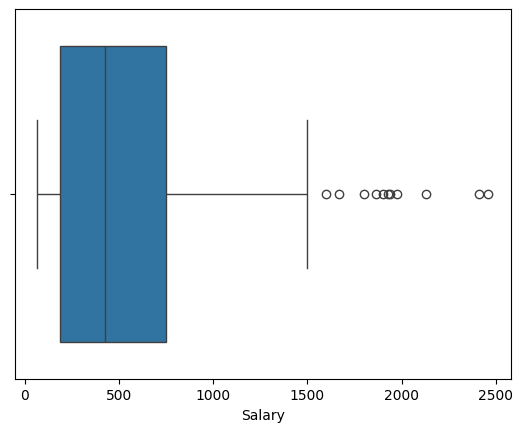

In [95]:
# Outliers (Aykırı Değerler)

sns.boxplot(x=df["Salary"], data=df)
plt.show(block=True)

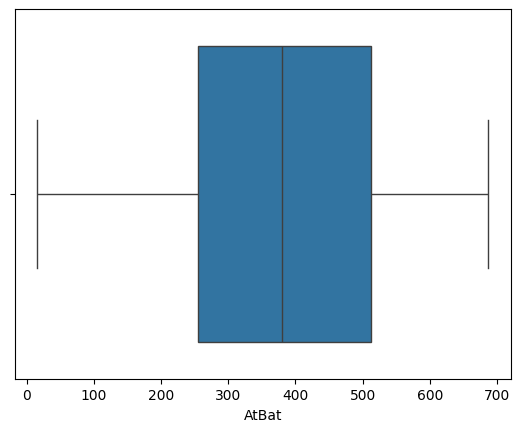

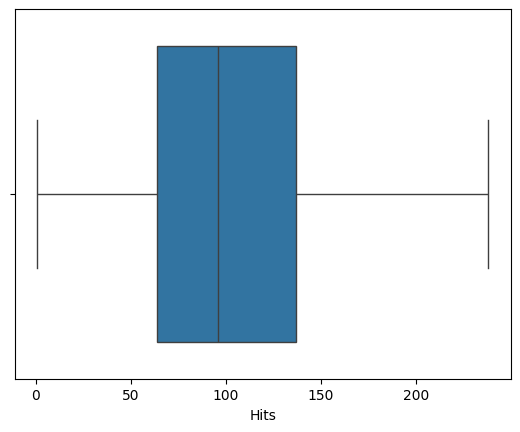

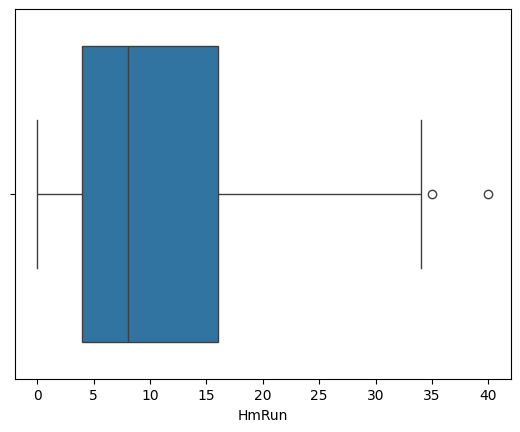

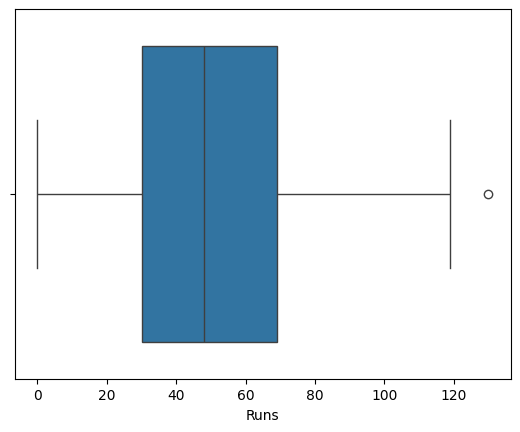

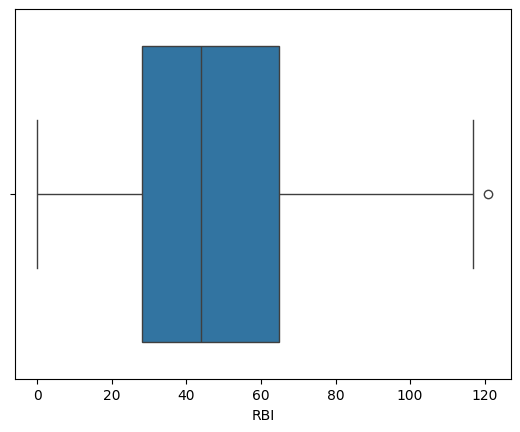

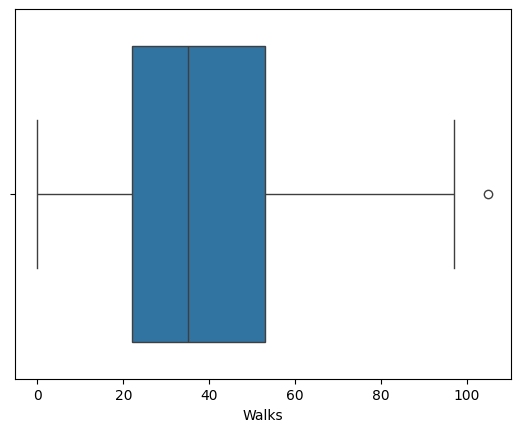

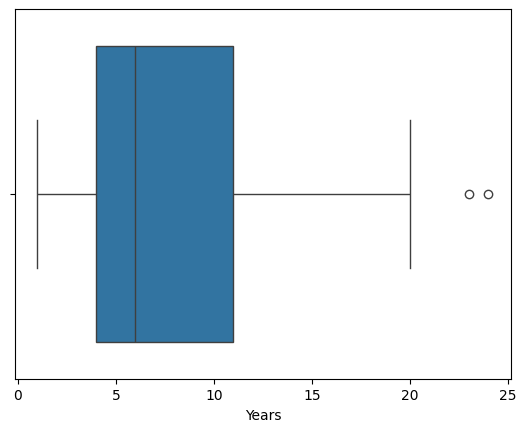

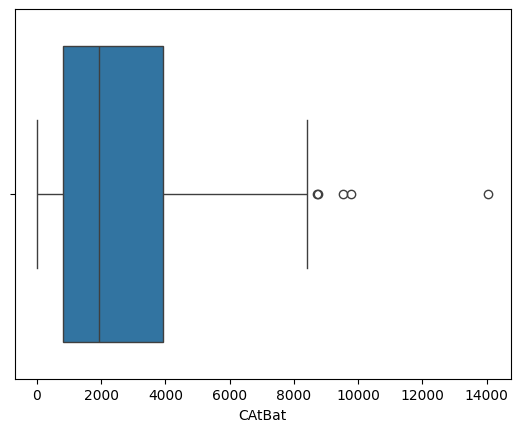

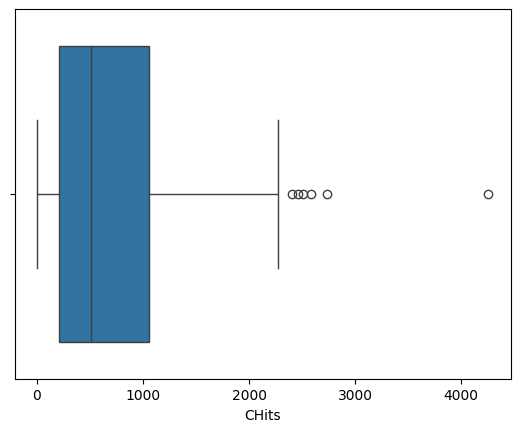

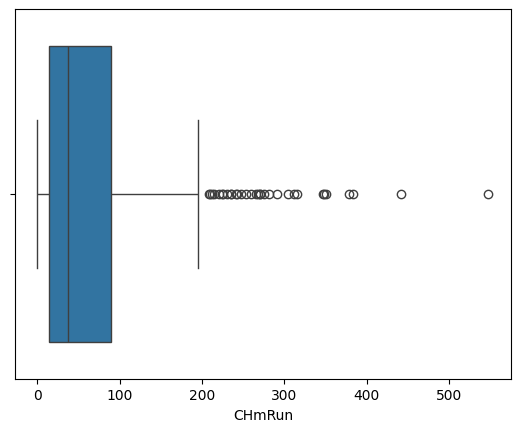

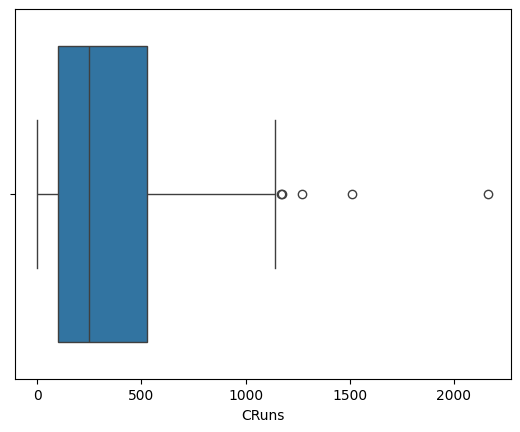

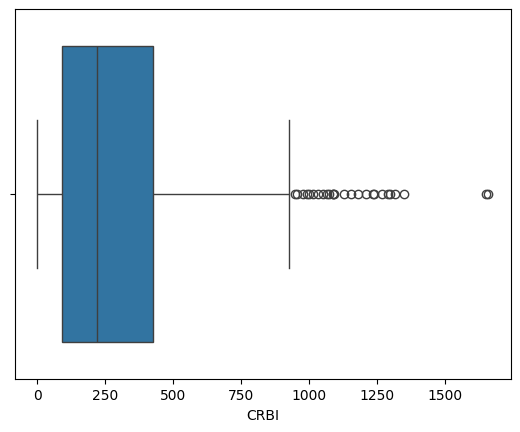

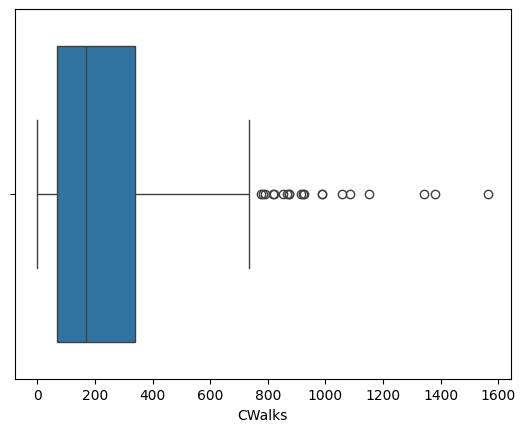

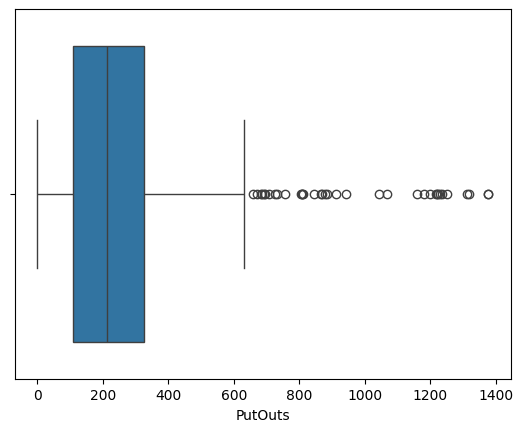

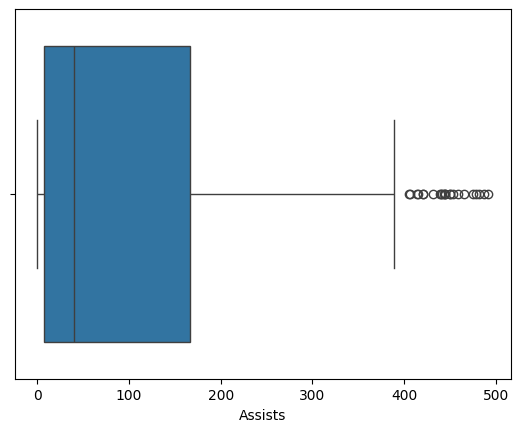

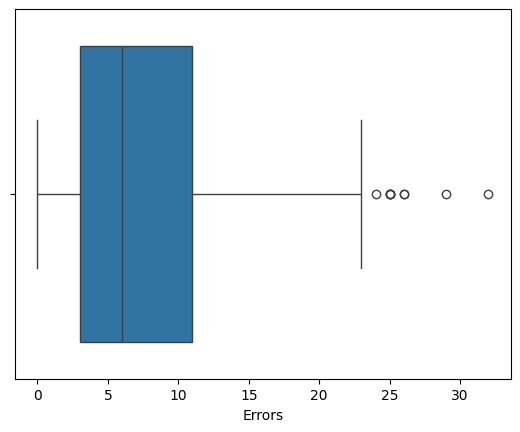

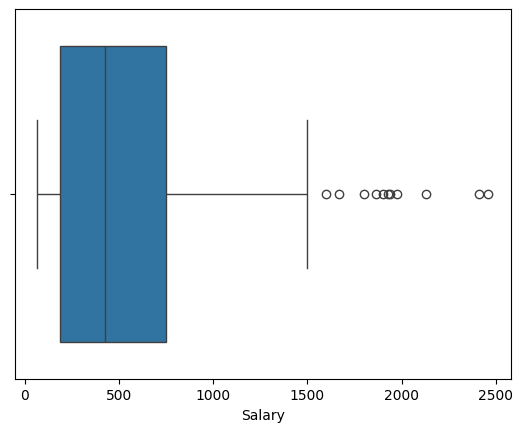

In [96]:
for col in num_cols:
  sns.boxplot(x=df[col], data=df)
  plt.show(block=True)

In [97]:
# Öyle bir fonksiyon yazalım ki kendisine girilen değerlerin eşik değerlerini hesaplıyor olsun
# q1 = 0.10 ve q3 = 0.90 değerlerinin 0.25 ve 0.75 seçmememizin nedeni aykırı değerler çok olması
# Çünkü baskılama yöntemi kullandığımız için daha fazla değişken baskılanmış olur. Bu da sonucumuzu etkiler.
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [98]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [99]:
# Baskılama işlemi yapan fonksiyon
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit) , variable] = low_limit   # Alt aykırı değer varsa low_limit ' e eşitle
  dataframe.loc[(dataframe[variable] > up_limit) , variable] = up_limit     # Üst aykırı değer varsa up_limit ' e eşitle

In [100]:
for col in num_cols:
  print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits True
CHmRun True
CRuns False
CRBI False
CWalks True
PutOuts False
Assists False
Errors False
Salary False


In [101]:
for col in num_cols:
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

In [102]:
for col in num_cols:
  print(col, check_outlier(df, col))

AtBat False
Hits False
HmRun False
Runs False
RBI False
Walks False
Years False
CAtBat False
CHits False
CHmRun False
CRuns False
CRBI False
CWalks False
PutOuts False
Assists False
Errors False
Salary False


In [104]:
# Missing Values (Eksik Değerler)
# Eksik değer varsa eksik değerlerin toplamını ve oranını yazdıran fonksiyon
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns

In [105]:
missing_values_table(df)

        n_miss  ratio
Salary      59 18.320


In [106]:
from sklearn.impute import KNNImputer

In [107]:
df = pd.get_dummies(df[cat_cols + num_cols], drop_first=True)
scaler = RobustScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = pd.DataFrame(scaler.inverse_transform(df), columns=df.columns)

In [108]:
# Feature Extraction (Özellik Çıkarımı)

In [109]:
new_num_cols = [col for col in df.columns if "Salary" not in col]
df[new_num_cols] = df[new_num_cols] + 0.00000000001   # 0' a bölme hatasının önüne geçtik

In [110]:
df["Hits_success"] = (df["Hits"] / df["AtBat"]) * 100
df["NEW_RBI"] = df["RBI"] / df["CRBI"]
df["NEW_Walks"] = df["Walks"] / df["CWalks"]
df["NEW_PutOuts"] = df["PutOuts"] * df["Years"]
df["NEW_Hits"] = df["Hits"] / df["CHits"] + df["Hits"]
df["NEW_CRBI*CATBAT"] = df["CRBI"] * df["CAtBat"]
df["NEW_Chits"] = df["CHits"] / df["Years"]
df["NEW_CHmRun"] = df["CHmRun"] * df["Years"]
df["NEW_CRuns"] = df["CRuns"] / df["Years"]
df["NEW_RW"] = df["RBI"] * df["Walks"]
df["NEW_CH_CB"] = df["CHits"] / df["CAtBat"]
df["NEW_CHm_CAT"] = df["CHmRun"] / df["CAtBat"]

In [111]:
df["Salary"].isnull().sum()

0

In [112]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N,Hits_success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHm_CAT
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,92.900,0.000,0.000,0.000,22.526,1.000,1.000,446.000,67.000,8497.000,66.000,1.000,30.000,406.000,0.225,0.003
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,1.000,1.000,1.000,25.714,0.092,0.104,8848.000,81.097,1427886.000,59.643,966.000,22.929,1482.000,0.242,0.020
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,880.000,82.000,14.000,480.000,0.000,1.000,0.000,27.140,0.271,0.289,2640.000,130.284,431984.000,152.333,189.000,74.667,5472.000,0.281,0.039
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,225.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,1.000,0.000,1.000,28.427,0.093,0.105,2200.000,141.090,4716264.000,143.182,2475.000,75.273,2886.000,0.280,0.040
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,805.000,40.000,4.000,91.500,1.000,0.000,1.000,27.103,0.913,0.909,1610.000,87.861,18216.000,50.500,24.000,24.000,1260.000,0.255,0.030


In [113]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 322
variables: 32
cat_cols: 3
num_cols: 29
cat_but_car: 0
num_but_cat: 3


In [114]:
# One-Hot Encoding

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
  dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
  for col in dataframe.columns:
    if dataframe[col].dtype == "bool":
      dataframe[col] = dataframe[col].astype(int)
  return dataframe

In [115]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [116]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Hits_success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,League_N_1.00000000001,Division_W_1.00000000001,NewLeague_N_1.00000000001
0,293.000,66.000,1.000,30.000,29.000,14.000,1.000,293.000,66.000,1.000,30.000,29.000,14.000,446.000,33.000,20.000,92.900,22.526,1.000,1.000,446.000,67.000,8497.000,66.000,1.000,30.000,406.000,0.225,0.003,0,0,0
1,315.000,81.000,7.000,24.000,38.000,39.000,14.000,3449.000,835.000,69.000,321.000,414.000,375.000,632.000,43.000,10.000,475.000,25.714,0.092,0.104,8848.000,81.097,1427886.000,59.643,966.000,22.929,1482.000,0.242,0.020,1,1,1
2,479.000,130.000,18.000,66.000,72.000,76.000,3.000,1624.000,457.000,63.000,224.000,266.000,263.000,880.000,82.000,14.000,480.000,27.140,0.271,0.289,2640.000,130.284,431984.000,152.333,189.000,74.667,5472.000,0.281,0.039,0,1,0
3,496.000,141.000,20.000,65.000,78.000,37.000,11.000,5628.000,1575.000,225.000,828.000,838.000,354.000,200.000,11.000,3.000,500.000,28.427,0.093,0.105,2200.000,141.090,4716264.000,143.182,2475.000,75.273,2886.000,0.280,0.040,1,0,1
4,321.000,87.000,10.000,39.000,42.000,30.000,2.000,396.000,101.000,12.000,48.000,46.000,33.000,805.000,40.000,4.000,91.500,27.103,0.913,0.909,1610.000,87.861,18216.000,50.500,24.000,24.000,1260.000,0.255,0.030,1,0,1


In [117]:
# Feature Scaling (Özellik Ölçeklendirme)

cat_cols, num_cols, cat_but_car = grab_col_names(df)

num_cols = [col for col in num_cols if col not in ["Salary"]]
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

observations: 322
variables: 32
cat_cols: 3
num_cols: 29
cat_but_car: 0
num_but_cat: 3


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,Hits_success,NEW_RBI,NEW_Walks,NEW_PutOuts,NEW_Hits,NEW_CRBI*CATBAT,NEW_Chits,NEW_CHmRun,NEW_CRuns,NEW_RW,NEW_CH_CB,NEW_CHm_CAT,League_N_1.00000000001,Division_W_1.00000000001,NewLeague_N_1.00000000001
0,-0.337,-0.411,-0.583,-0.465,-0.408,-0.677,-0.714,-0.526,-0.520,-0.480,-0.509,-0.567,-0.575,1.085,-0.041,1.750,92.900,-0.896,2.228,2.405,-0.366,-0.401,-0.272,-0.328,-0.296,-0.398,-0.464,-1.209,-0.739,0,0,0
1,-0.251,-0.205,-0.083,-0.619,-0.163,0.129,1.143,0.489,0.385,0.414,0.174,0.573,0.752,1.947,0.022,0.500,475.000,-0.052,-0.328,-0.350,4.030,-0.208,0.625,-0.432,1.020,-0.615,-0.034,-0.663,-0.060,1,1,1
2,0.388,0.466,0.833,0.465,0.762,1.323,-0.429,-0.098,-0.060,0.336,-0.054,0.135,0.340,3.096,0.267,1.000,480.000,0.325,0.175,0.219,0.782,0.465,-0.004,1.078,-0.040,0.968,1.562,0.614,0.710,0,1,0
3,0.454,0.616,1.000,0.439,0.925,0.065,0.714,1.191,1.255,2.467,1.364,1.830,0.675,-0.056,-0.179,-0.375,500.000,0.665,-0.324,-0.348,0.552,0.612,2.701,0.929,3.077,0.986,0.528,0.563,0.758,1,0,1
4,-0.228,-0.123,0.167,-0.232,-0.054,-0.161,-0.571,-0.493,-0.479,-0.336,-0.467,-0.517,-0.506,2.749,0.003,-0.250,91.500,0.315,1.983,2.126,0.243,-0.115,-0.265,-0.581,-0.264,-0.582,-0.122,-0.242,0.362,1,0,1


In [118]:
# MODELING

y = df["Salary"]
x = df.drop(["Salary"], axis=1)

In [119]:
print(x.shape, y.shape)

(322, 31) (322,)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=46)

In [121]:
model = LinearRegression()
model = model.fit(X_train, y_train)

In [122]:
y_pred = model.predict(X_train)
model_test_rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print("LINEAR REGRESSION TRAIN RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_train, y_pred))))

LINEAR REGRESSION TRAIN RMSE: 227.42


In [123]:
model_train_r2 = model.score(X_train, y_train)
print("LINEAR REGRESSION TRAIN R-SQUARED:", "{:,.3f}".format(model.score(X_train, y_train)))

LINEAR REGRESSION TRAIN R-SQUARED: 0.735


In [124]:
y_pred = model.predict(X_test)
model_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("LINEAR REGRESSION TEST RMSE:", "{:,.2f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

LINEAR REGRESSION TEST RMSE: 207.32


In [125]:
model_train_r2 = model.score(X_test, y_test)
print("LINEAR REGRESSION TEST R-SQUARED:", "{:,.3f}".format(model.score(X_test, y_test)))

LINEAR REGRESSION TEST R-SQUARED: 0.731


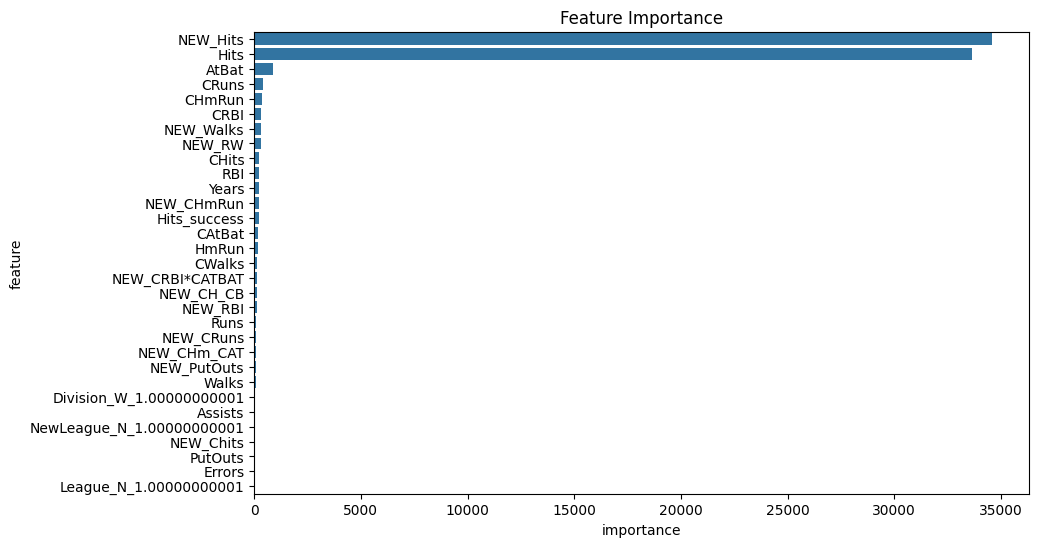

In [126]:
# Önemli Özellikleri Görselleştirme
feature_importance = pd.DataFrame({"feature": x.columns, "importance": np.abs(model.coef_)})
feature_importance.sort_values(by="importance", ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()